<a href="https://colab.research.google.com/github/Narendraiitg/Regression_ANN_on_house_price_pred/blob/main/Regression_ANN_on_house_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving housing.data to housing.data
User uploaded file "housing.data" with length 49082 bytes


In [2]:
import pandas as pd
import io
BHNames= ['crim','zs','indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'patratio', 'black', 'lstat', 'medv']
data= pd.read_csv('housing.data', delim_whitespace=True, names= BHNames)
data.head(20)


# There are 14 attributes abribation are:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's


,crim,zs,indus,chas,nox,rm,age,dis,rad,tax,patratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


So there are total 14 atributes out of them 13 are independent and one mdev is the dependent atribute which we need to predict

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crim      506 non-null    float64
 1   zs        506 non-null    float64
 2   indus     506 non-null    float64
 3   chas      506 non-null    int64  
 4   nox       506 non-null    float64
 5   rm        506 non-null    float64
 6   age       506 non-null    float64
 7   dis       506 non-null    float64
 8   rad       506 non-null    int64  
 9   tax       506 non-null    float64
 10  patratio  506 non-null    float64
 11  black     506 non-null    float64
 12  lstat     506 non-null    float64
 13  medv      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [4]:
summary = data.describe()
print(summary.transpose())

          count        mean         std        min         25%        50%  \
crim      506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zs        506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus     506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas      506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox       506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm        506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age       506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis       506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad       506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax       506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
patratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
black     506.0  356.674032   91.294864    0.32000  375.377500  391.44000   

In [6]:
# scaling the data between 0 and 1 using minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaledData= scaler.fit_transform(data)
scaledData= pd.DataFrame(scaledData, columns= BHNames)

In [8]:
summary = scaledData.describe()
print(summary.transpose())

          count      mean       std  min       25%       50%       75%  max
crim      506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zs        506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus     506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas      506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox       506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm        506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age       506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis       506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad       506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax       506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
patratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black     506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat     50

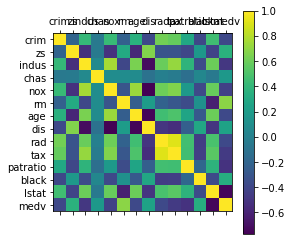

In [9]:
import matplotlib.pyplot as plt
CorData=scaledData.corr(method='pearson')
plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)),CorData.columns)
plt.yticks(range(len(CorData.columns)),CorData.columns)
plt.colorbar()
plt.show()

In [10]:
# Spiliting the data set into training and testing 
X= scaledData.drop('medv', axis=1)
print('X Shape=', X.shape)

Y= scaledData['medv']
print('Y Shape=', Y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.3, random_state=5)
print('X_train Shape=', X_train.shape)
print('y_train Shape=', y_train.shape)
print('X_test Shape=', X_test.shape)
print('y_test Shape=', y_test.shape)

X Shape= (506, 13)
Y Shape= (506,)
X_train Shape= (354, 13)
y_train Shape= (354,)
X_test Shape= (152, 13)
y_test Shape= (152,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:

model= Sequential()

#The first hidden layer has 20 nodes and uses the relu activation function.
model.add(Dense(20, input_shape=(13,), activation='relu'))

#The first hidden layer has 10 nodes and uses the relu activation function.
model.add(Dense(10, activation='relu'))

# Adding the output layer with linear activation function
model.add(Dense(1, activation='linear')) 


In [15]:
model.compile(optimizer="Adam", loss='mean_squared_error', metrics= ['accuracy'])

In [16]:
# Training the model
model.fit(X_train, y_train, epochs=1000, verbose=0)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Testing the test data
y_pred= model.predict(X_test)
score= model.evaluate(X_test, y_test, verbose=0) # Calculating MSE
print(score[0]) # Printing MSE

5/5 [==============================] - 0s 2ms/step
0.006975976284593344


We can see the MSE of the model above is very low ie. 0.007 which simply implies that our model is much accurate to predict the medv value.